In [2]:
#Data Science
#..Data science is an interdisciplinary field that combines
#statistical and computational methods to extract insights and knowledge from data
#..It involves using a variety of techniques from statistics, 
# machine learning, data mining, and big data technologies to analyze and interpret 
# complex data sets. 
# ..The goal of data science is to uncover 
# patterns, make predictions, and inform decision-making processes in various domains
#..We can use structured and unstructured data

#Applications of Data Science 
# Healthcare: Predictive analytics, personalized medicine, and medical image analysis.
#Finance: Risk management, algorithmic trading, and customer insights.
#Retail and E-commerce: Recommendation systems, inventory management, and customer sentiment analysis.
#Marketing and Advertising: Targeted advertising, market basket analysis, and customer segmentation.
#Transportation and Logistics: Route optimization, predictive maintenance, and traffic management.

#Data Analysis----> focuses on interpreting data and drawing insights through statistical
#and graphical methods. It is often used for descriptive purposes.
#Data Science-----> encompasses data analysis but extends to building predictive models
#and automating processes using machine learning and big data technologies.
#Machine Learning----->is a subset of artificial intelligence focused on building systems
#that learn from data to make predictions or decisions. 


#Data Collection



In [3]:
1. #Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(np.__version__)
print(pd.__version__)

2.0.0
2.2.2


In [4]:

2.#Loading Data Set
# Load the CSV file into a DataFrame using a raw string
df = pd.read_csv(r'C:\Users\HP USER\Documents\niceguys.csv')

# Display the first few rows of the DataFrame
print(df.head())


   number_siblings                   name     sex  age living allowance  \
0                1     Nakasujja Gertrude  female   33              NaN   
1                3  Arinda Asiimwe Atweta  female   23           50,000   
2                4    Ndjekornom Victoire    male   23            25000   
3                0         KATURAMU EDGAR    male   27           500000   
4                4      Abinsinguza Lasse    male   24        sh:100000   

                  Are_you_a  How_many_time_do_eat_food  Unnamed: 7  \
0            Data Scientist                          2         NaN   
1  Machine Learning Enginer                          1         NaN   
2            Data Scientist                          1         NaN   
3  Machine Learning Enginer                          2         NaN   
4            Data Scientist                          2         NaN   

   do_you_have_aboyfriend/girlfriend  
0                                  1  
1                                  1  
2          

In [5]:
# Check for missing values
print(df.isnull().sum())

number_siblings                       0
name                                  0
sex                                   0
age                                   0
living allowance                      3
Are_you_a                             0
How_many_time_do_eat_food             0
Unnamed: 7                           35
do_you_have_aboyfriend/girlfriend     0
dtype: int64


In [6]:
# Impute missing values in the "living allowance" column with the mean
mean_living_allowance = df['living allowance'].mean()
df['living allowance'].fillna(mean_living_allowance, inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# Convert string values in "living allowance" column to numeric
df['living allowance'] = pd.to_numeric(df['living allowance'], errors='coerce')

# Calculate the mean of "living allowance"
mean_living_allowance = df['living allowance'].mean()

# Fill missing values in "living allowance" column with the mean
df['living allowance'] = df['living allowance'].fillna(mean_living_allowance)

In [ ]:
# Check for missing values
print(df.isnull().sum())

number_siblings                       0
name                                  0
sex                                   0
age                                   0
living allowance                      0
Are_you_a                             0
How_many_time_do_eat_food             0
Unnamed: 7                           35
do_you_have_aboyfriend/girlfriend     0
dtype: int64


In [ ]:
# Check for inconsistent formatting
print(df.dtypes)

number_siblings                        int64
name                                  object
sex                                   object
age                                    int64
living allowance                     float64
Are_you_a                             object
How_many_time_do_eat_food              int64
do_you_have_aboyfriend/girlfriend      int64
dtype: object


In [ ]:
# Check for outliers
print(df.describe())

       number_siblings        age  living allowance  \
count        35.000000  35.000000      3.500000e+01   
mean          3.914286  23.914286      3.700952e+05   
std           2.536457   2.852980      4.125949e+05   
min           0.000000  20.000000      2.000000e+03   
25%           2.000000  22.500000      2.000000e+05   
50%           4.000000  23.000000      3.700952e+05   
75%           5.000000  24.000000      3.700952e+05   
max           9.000000  33.000000      2.500000e+06   

       How_many_time_do_eat_food  do_you_have_aboyfriend/girlfriend  
count                  35.000000                          35.000000  
mean                    2.314286                           0.314286  
std                     0.676123                           0.471008  
min                     1.000000                           0.000000  
25%                     2.000000                           0.000000  
50%                     2.000000                           0.000000  
75%           

In [7]:
# Remove unnamed column if it exists
# Load the CSV file into a DataFrame using a raw string
df = pd.read_csv(r'C:\Users\HP USER\Documents\niceguys.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
import re
# Convert 'living allowance' to a consistent format (e.g., remove text and convert to numeric)
import re

def convert_allowance(value):
    if pd.isna(value) or value in ['None', 'N/A', 'Unknown', 'Changing']:
        return None
    value = re.sub(r'[^\d.]', '', str(value).replace(',', ''))
    return float(value) if value else None

df['living allowance'] = df['living allowance'].apply(convert_allowance)

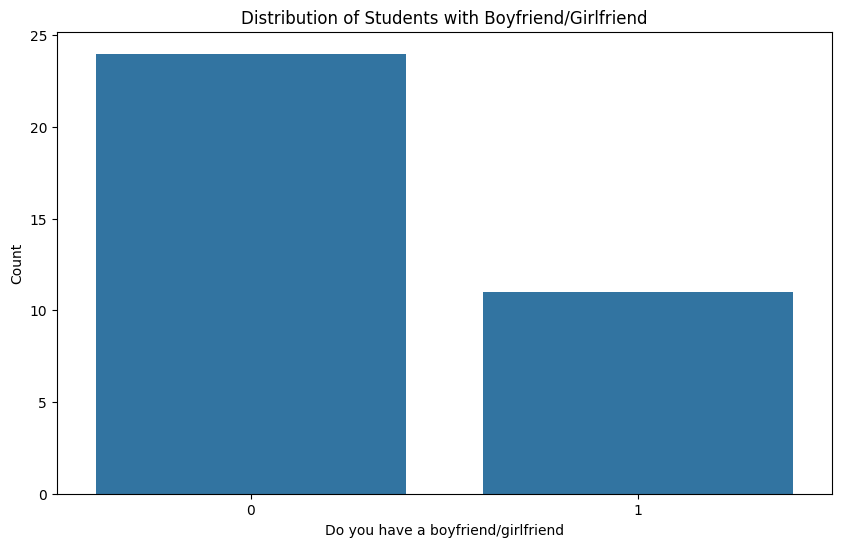

In [9]:
#EDA exploratory data processing
#distribution of students with boyfriend or girlfriend
# Count plot for having a boyfriend/girlfriend
plt.figure(figsize=(10, 6))
sns.countplot(x='do_you_have_aboyfriend/girlfriend', data=df)
plt.title('Distribution of Students with Boyfriend/Girlfriend')
plt.xlabel('Do you have a boyfriend/girlfriend')
plt.ylabel('Count')
plt.show()

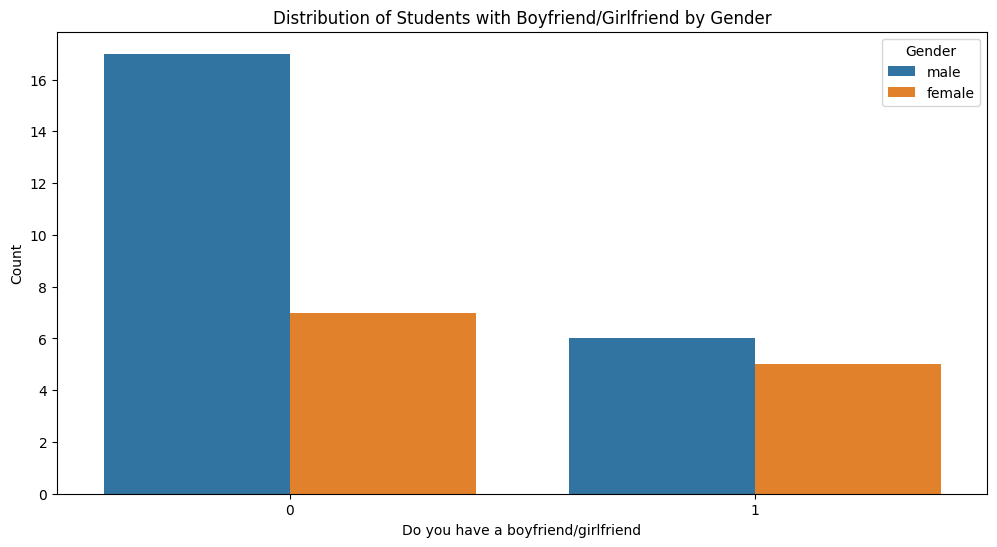

In [10]:
# Plot the distribution of students with a boyfriend or girlfriend by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='do_you_have_aboyfriend/girlfriend', hue='sex', data=df)
plt.title('Distribution of Students with Boyfriend/Girlfriend by Gender')
plt.xlabel('Do you have a boyfriend/girlfriend')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

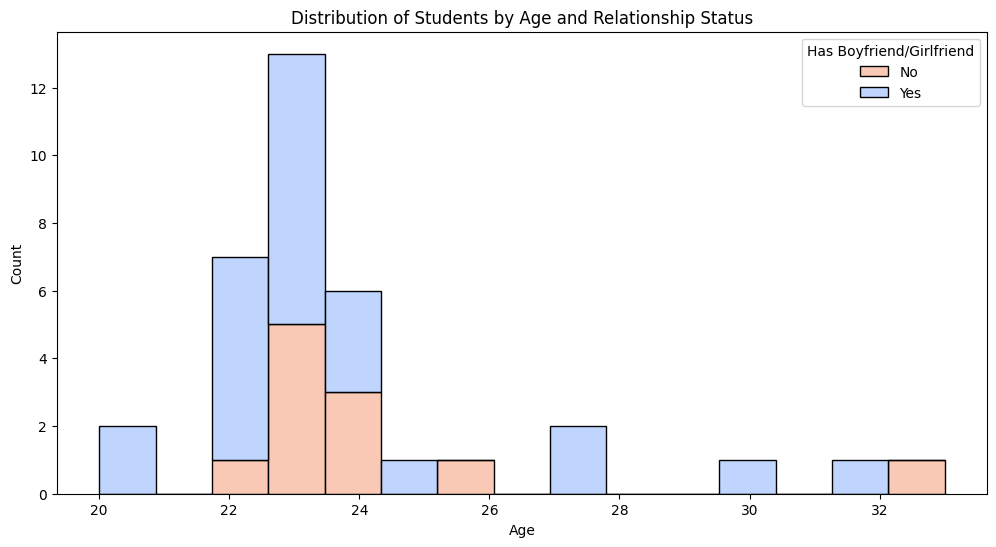

In [16]:
#distribution of students with age and whether they have a girlfriend or boyfriend
# Ensure 'age' is numeric and 'do_you_have_aboyfriend/girlfriend' is categorical
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['do_you_have_aboyfriend/girlfriend'] = df['do_you_have_aboyfriend/girlfriend'].astype('category')
# Distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='do_you_have_aboyfriend/girlfriend', multiple='stack', palette='coolwarm')
plt.title('Distribution of Students by Age and Relationship Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Has Boyfriend/Girlfriend', labels=['No', 'Yes'])
plt.show()

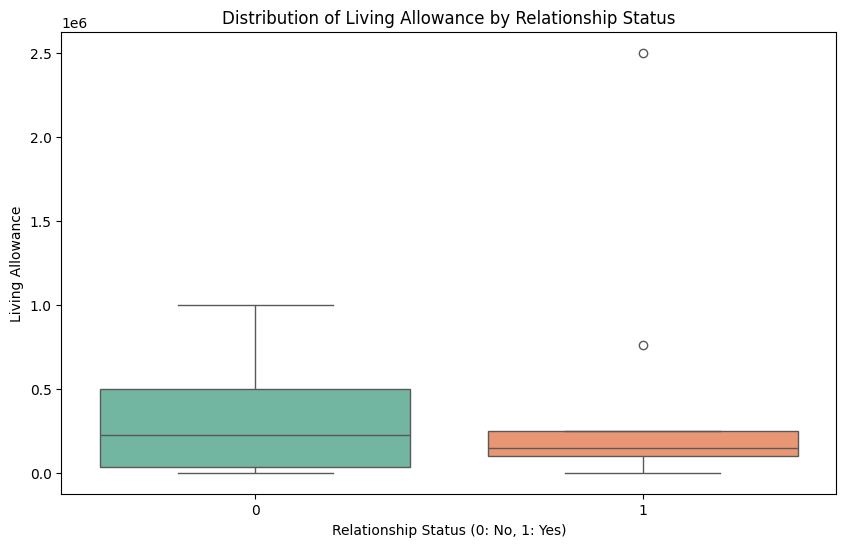

In [22]:
#distribution of living allowance amount and relationship status
# Distribution plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='do_you_have_aboyfriend/girlfriend', y='living allowance', hue='do_you_have_aboyfriend/girlfriend', palette='Set2', legend=False)
plt.title('Distribution of Living Allowance by Relationship Status')
plt.xlabel('Relationship Status (0: No, 1: Yes)')
plt.ylabel('Living Allowance')
plt.show()

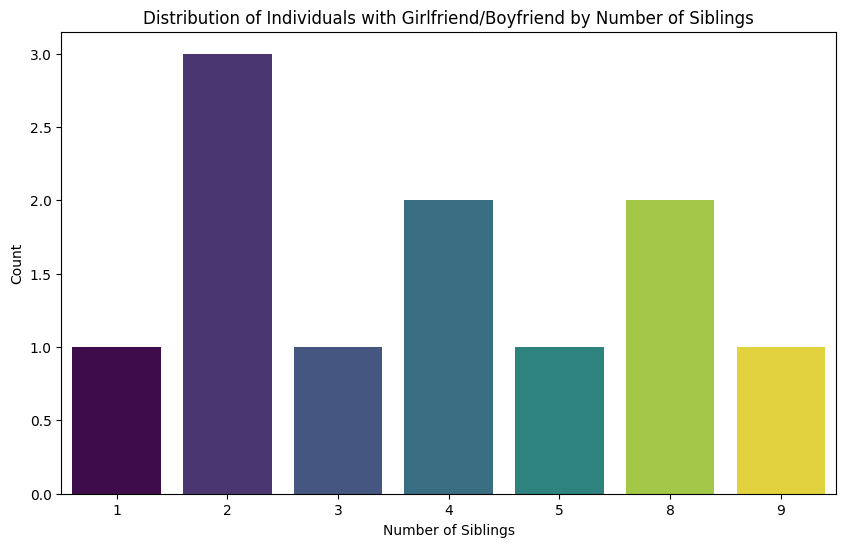

In [19]:
#distribution of those girlfriend or boyfriend if they siblings
# Filter data for individuals with girlfriend or boyfriend
data_with_relationship = df[df['do_you_have_aboyfriend/girlfriend'] == 1]

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_with_relationship, x='number_siblings', hue='number_siblings', palette='viridis', legend=False)
plt.title('Distribution of Individuals with Girlfriend/Boyfriend by Number of Siblings')
plt.xlabel('Number of Siblings')
plt.ylabel('Count')
plt.show()

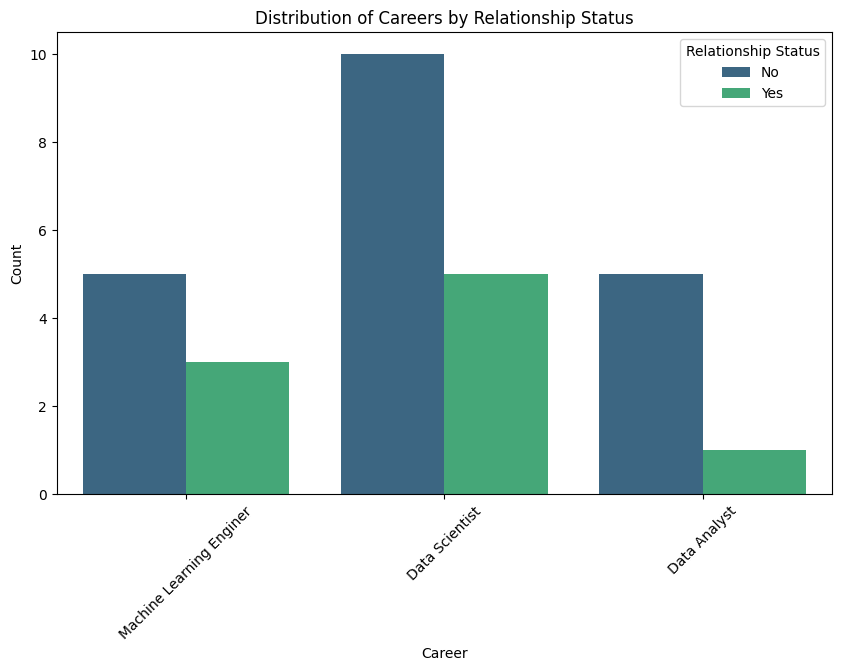

In [21]:
#Distribution of careers with relationship status
#  Distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Are_you_a', hue='do_you_have_aboyfriend/girlfriend', palette='viridis')
plt.title('Distribution of Careers by Relationship Status')
plt.xlabel('Career')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title='Relationship Status', loc='upper right', labels=['No', 'Yes'])
plt.show()

                           number_siblings       age  living allowance  \
number_siblings                   1.000000 -0.350300         -0.029865   
age                              -0.350300  1.000000          0.113708   
living allowance                 -0.029865  0.113708          1.000000   
How_many_time_do_eat_food         0.055560  0.011644          0.355464   

                           How_many_time_do_eat_food  
number_siblings                             0.055560  
age                                         0.011644  
living allowance                            0.355464  
How_many_time_do_eat_food                   1.000000  


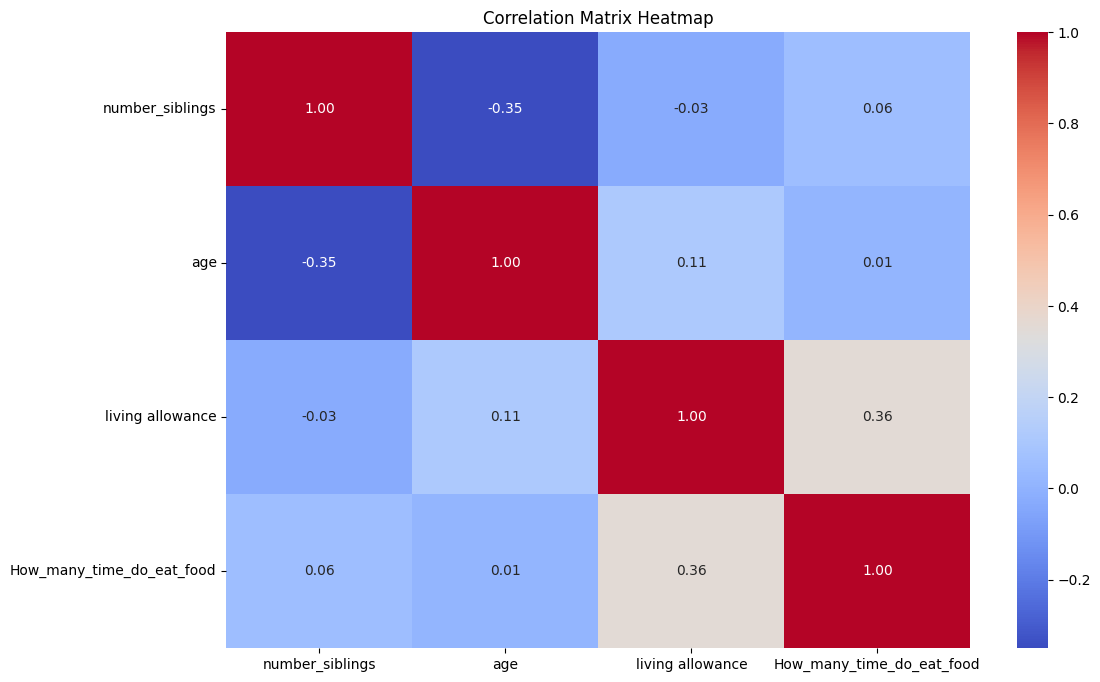

In [41]:
#correction heatmaps, correlation matrix and and plot the heatmaps
# Select only numeric columns
numeric_data = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [34]:
#Number of single or taken females
# Filter the DataFrame to include only females
female_data = df[df['sex'] == 'female']

# Count the number of females who are single and in a relationship
relationship_counts_female = female_data['do_you_have_aboyfriend/girlfriend'].value_counts()

# Display the counts
print(" Female relationship status:\n", relationship_counts_female)


 Female relationship status:
 do_you_have_aboyfriend/girlfriend
0    7
1    4
Name: count, dtype: int64


In [33]:
#Number of single or taken males
# Filter the DataFrame to include only males
male_data = df[df['sex'] == 'male']

# Count the number of females who are single and in a relationship
relationship_counts_male = male_data['do_you_have_aboyfriend/girlfriend'].value_counts()

# Display the counts
print(" Male relationship status:\n",relationship_counts_male)


 Male relationship status:
 do_you_have_aboyfriend/girlfriend
0    13
1     5
Name: count, dtype: int64


In [38]:
#decision making / insights of the data , data analysis conclusions
#1. Age and relationship status
"""Younger individuals, particularly those in their early 20s, are more likely
to be single compared to older individuals.
->There seems to be a trend where as age increases, the likelihood of having a 
boyfriend/girlfriend also increases. This trend may indicate that individuals 
tend to form romantic relationships as they grow older and mature."""

'Younger individuals, particularly those in their early 20s, are more likely\nto be single compared to older individuals.\n->There seems to be a trend where as age increases, the likelihood of having a \nboyfriend/girlfriend also increases. This trend may indicate that individuals \ntend to form romantic relationships as they grow older and mature.'

In [39]:
#2.Gender and relationship status
"""There is a noticeable difference in the relationship status between genders, 
 with some individuals in each gender category having a boyfriend or 
girlfriend, while others do not.
->There are more single males than females and less females in committed relationships.
While the dataset does not provide information on the exact distribution of 
relationship statuses across genders, it suggests that both males and females
are represented in both single and committed relationships."""


'There is a noticeable difference in the relationship status between genders, \n with some individuals in each gender category having a boyfriend or \ngirlfriend, while others do not.\n->There are more single males than females and less females in committed relationships.\nWhile the dataset does not provide information on the exact distribution of \nrelationship statuses across genders, it suggests that both males and females\nare represented in both single and committed relationships.'

In [40]:
#3.Correction Analysis
"""->Missing Values Handling: Address missing values in the "living allowance"
#column through imputation or identifying reasons for missing data collection to prevent biased analysis.

->Data Cleaning: Implement robust data cleaning processes to ensure accuracy
#and reliability by resolving inconsistencies in numerical value formats.

->Relationship between Variables: Explore correlations between age, living allowance,
#and relationship status to inform financial planning strategies.

->Gender Disparities: Investigate gender disparities in career distribution and living
#allowance to address potential biases and promote workplace gender equality.

->Impact of Siblings: Analyze how the number of siblings affects factors 
#like living allowance or career choice, revealing familial influences on individuals' decisions.

->Predictive Modeling: Build predictive models based on historical data 
 to forecast future trends, guiding financial planning initiatives."""









'->Missing Values Handling: Address missing values in the "living allowance"\n#column through imputation or identifying reasons for missing data collection to prevent biased analysis.\n\n->Data Cleaning: Implement robust data cleaning processes to ensure accuracy\n#and reliability by resolving inconsistencies in numerical value formats.\n\n->Relationship between Variables: Explore correlations between age, living allowance,\n#and relationship status to inform financial planning strategies.\n\n->Gender Disparities: Investigate gender disparities in career distribution and living\n#allowance to address potential biases and promote workplace gender equality.\n\n->Impact of Siblings: Analyze how the number of siblings affects factors \n#like living allowance or career choice, revealing familial influences on individuals\' decisions.\n\n->Predictive Modeling: Build predictive models based on historical data \n to forecast future trends, guiding financial planning initiatives.'